In [30]:
#importing the necessary libraries

In [31]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

In [32]:
df = pd.read_csv('historic.csv')
df.head()

,item_no,category,main_promotion,color,stars,success_indicator
0,739157,Tunic,Catalog,Green,3.1,flop
1,591846,Hoodie,Category_Highlight,Red,1.5,flop
2,337574,Sweatshirt,Catalog,Red,4.4,top
3,401933,Polo-Shirt,Category_Highlight,Blue,3.1,flop
4,812151,Hoodie,Category_Highlight,Green,4.1,top


In [33]:
#basic information about dataset

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_no            8000 non-null   int64  
 1   category           8000 non-null   object 
 2   main_promotion     8000 non-null   object 
 3   color              8000 non-null   object 
 4   stars              8000 non-null   float64
 5   success_indicator  8000 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 375.1+ KB


In [35]:
#statistics of numeric features

In [36]:
df.describe()

,item_no,stars
count,8000.000000,8000.000000
mean,546474.338375,3.473075
std,256513.463874,0.978810
min,100171.000000,0.300000
25%,325001.500000,2.800000
50%,547081.000000,3.500000
75%,764312.250000,4.200000
max,989740.000000,6.100000


In [37]:
#checking for null values
df.isnull().sum()

item_no              0
category             0
main_promotion       0
color                0
stars                0
success_indicator    0
dtype: int64

In [38]:
#checking the distribution of the target variable
df['success_indicator'].value_counts()

top     5185
flop    2815
Name: success_indicator, dtype: int64

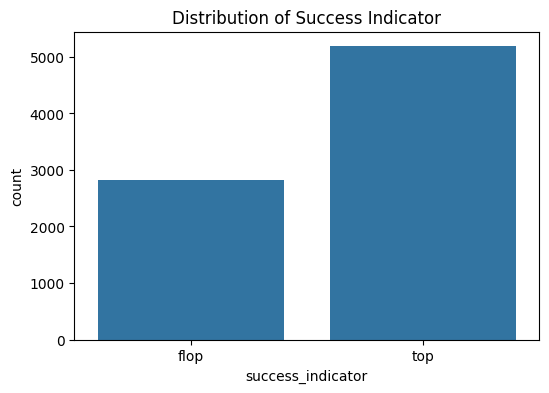

In [39]:
#visual representation of distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='success_indicator', data=df)
plt.title('Distribution of Success Indicator')
plt.show()

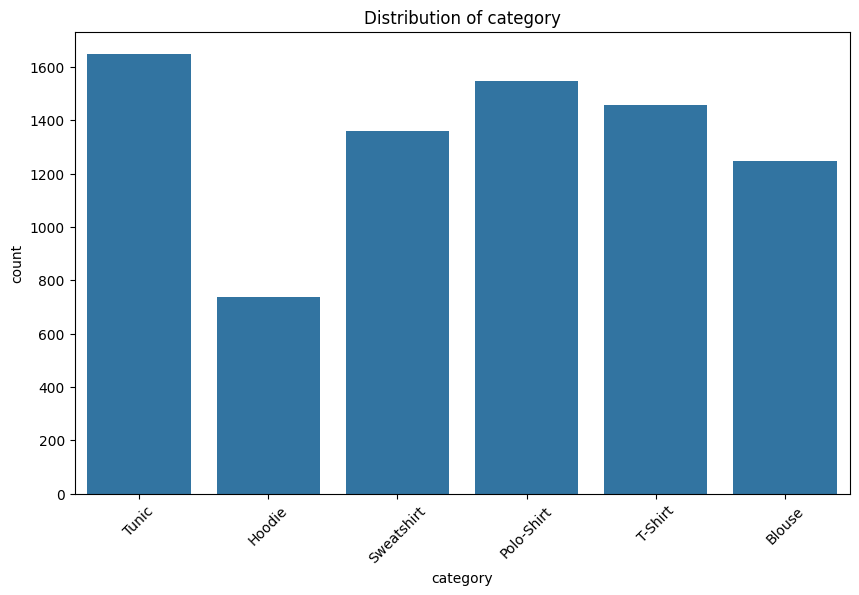

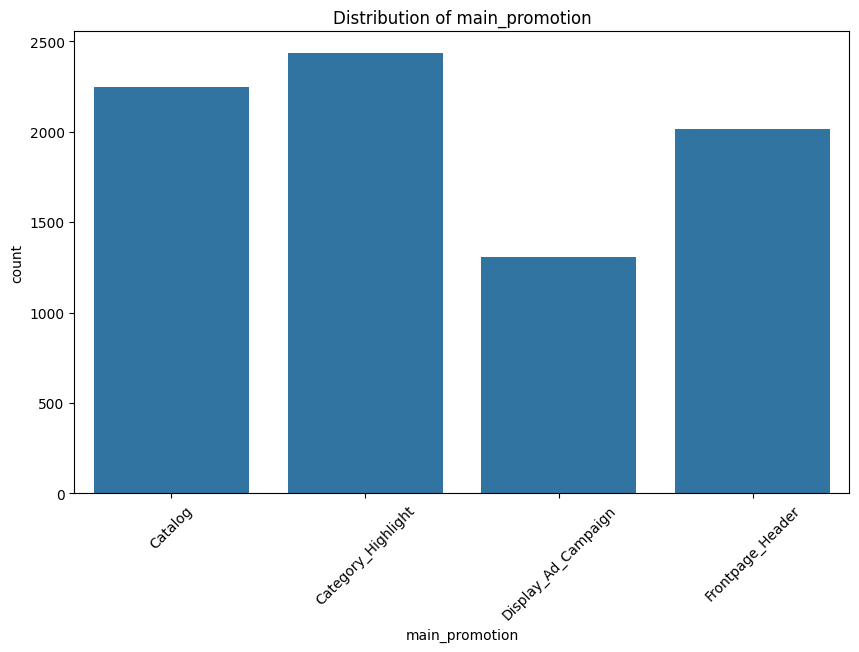

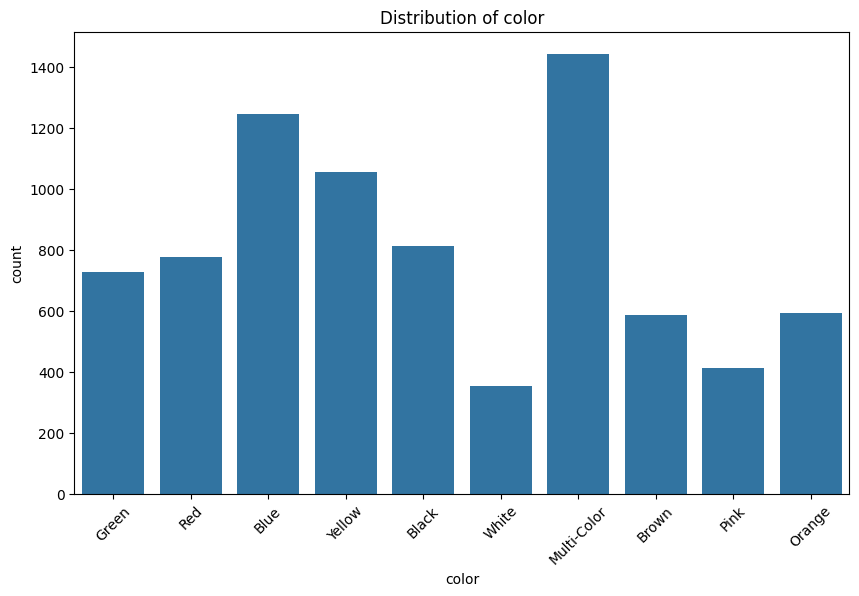

In [40]:
#visual representation of distribution of categorical features
categorical_features = ['category', 'main_promotion', 'color']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, data=df)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)
    plt.show()


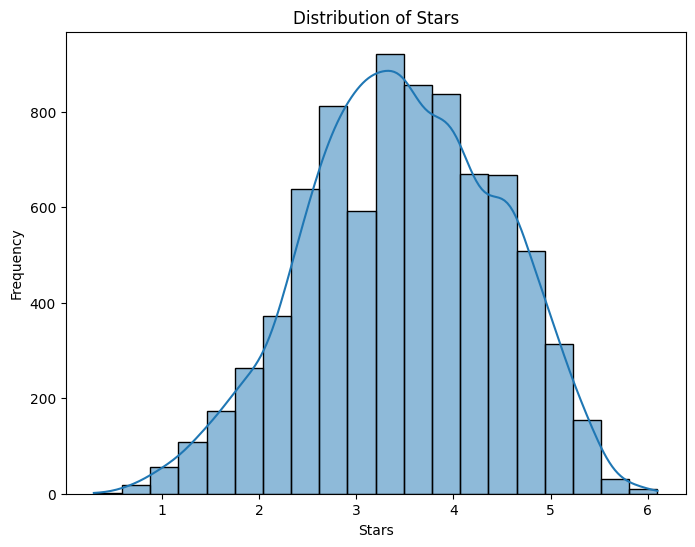

In [41]:
#visual representation of distribution of stars
plt.figure(figsize=(8, 6))
sns.histplot(df['stars'], bins=20, kde=True)
plt.title('Distribution of Stars')
plt.xlabel('Stars')
plt.ylabel('Frequency')
plt.show()

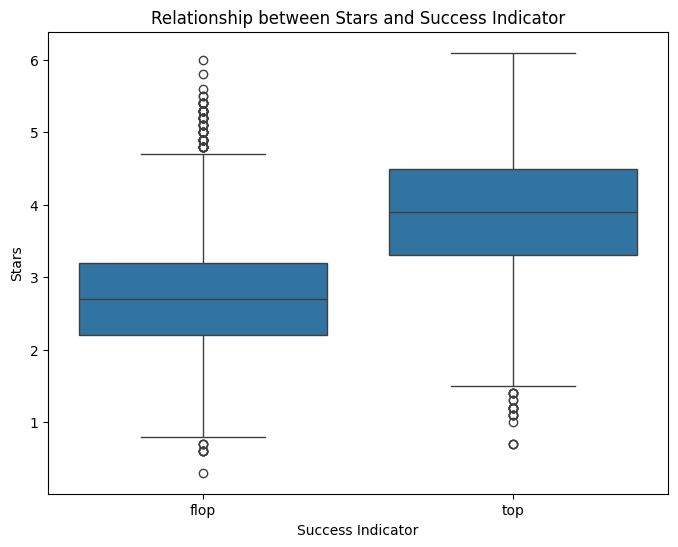

In [42]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='success_indicator', y='stars', data=df)
plt.title('Relationship between Stars and Success Indicator')
plt.xlabel('Success Indicator')
plt.ylabel('Stars')
plt.show()

In [43]:
#categorical analysis
df['category'].value_counts()

Tunic         1650
Polo-Shirt    1546
T-Shirt       1459
Sweatshirt    1360
Blouse        1246
Hoodie         739
Name: category, dtype: int64

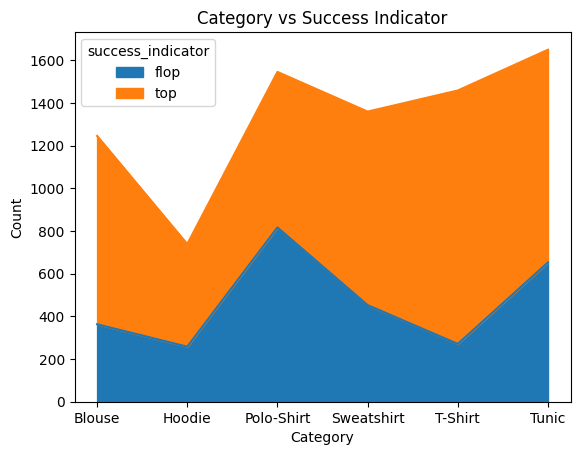

In [44]:
#visual representation of categories vs their success
graph = pd.crosstab(df['category'], df['success_indicator'])

# Plot stacked area plot
graph.plot.area(stacked=True)

plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Category vs Success Indicator')
plt.show()

In [45]:
#analysis based on main promotion feature
df['main_promotion'].value_counts()

Category_Highlight     2432
Catalog                2246
Frontpage_Header       2013
Display_Ad_Campaign    1309
Name: main_promotion, dtype: int64

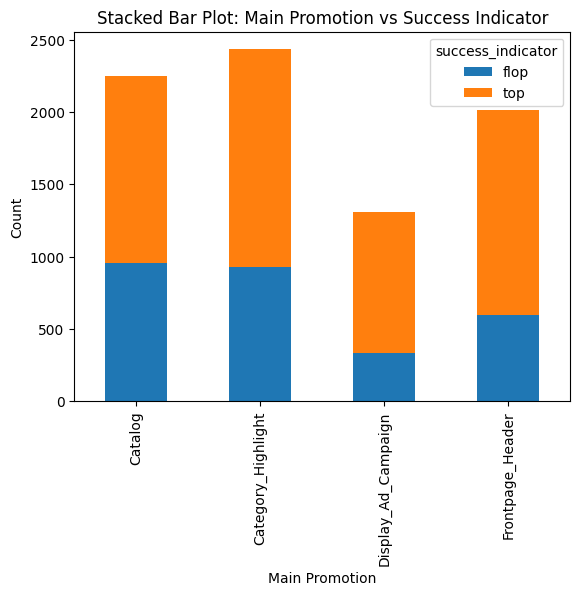

In [46]:
#visual representation of main promotion vs their success indicator
graph = pd.crosstab(df['main_promotion'], df['success_indicator'])
graph.plot.bar(stacked=True)
plt.xlabel('Main Promotion')
plt.ylabel('Count')
plt.title('Stacked Bar Plot: Main Promotion vs Success Indicator')
plt.show()

In [47]:
#color feature analysis
df['color'].value_counts()

Multi-Color    1443
Blue           1244
Yellow         1056
Black           812
Red             776
Green           728
Orange          592
Brown           585
Pink            412
White           352
Name: color, dtype: int64

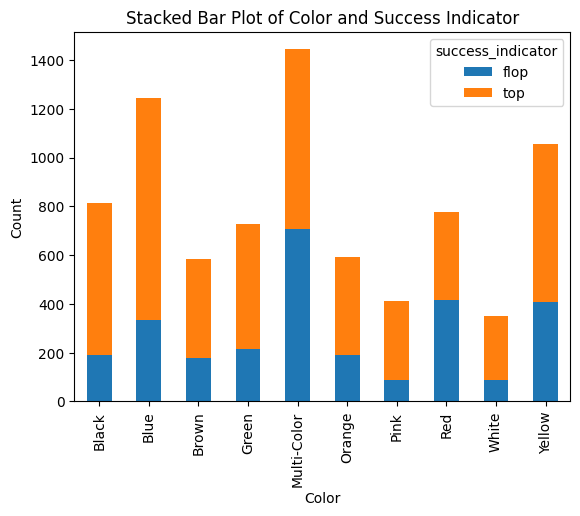

In [48]:
#visual representation of product color vs their success indicator
color = pd.crosstab(df['color'], df['success_indicator'])
color.plot(kind='bar', stacked=True)
plt.xlabel('Color')
plt.ylabel('Count')
plt.title('Stacked Bar Plot of Color and Success Indicator')
plt.show()

In [49]:
#star feature analysis
df['stars'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8000 entries, 0 to 7999
Series name: stars
Non-Null Count  Dtype  
--------------  -----  
8000 non-null   float64
dtypes: float64(1)
memory usage: 62.6 KB


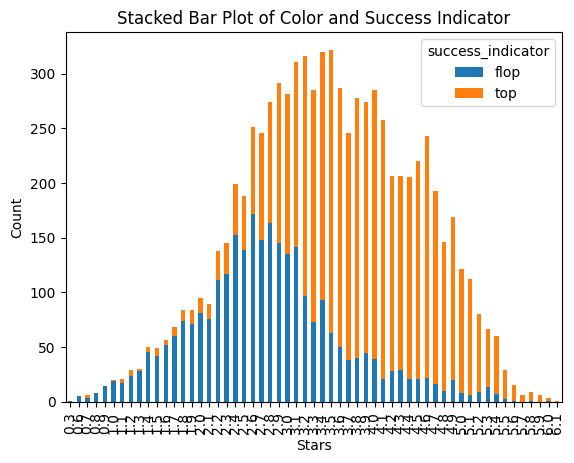

In [50]:
#visual representation of product stars vs their success indicator
star = pd.crosstab(df['stars'], df['success_indicator'])
star.plot(kind='bar', stacked=True)
plt.xlabel('Stars')
plt.ylabel('Count')
plt.title('Stacked Bar Plot of Color and Success Indicator')
plt.show()